<a href="https://colab.research.google.com/github/Subhan5838/capstone-project/blob/main/Tesseract_Check_MICR_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! apt install tesseract-ocr
! apt install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libarchive-dev libleptonica-dev
The following NEW packages will be installed:
  libarchive-dev libleptonica-dev libtesseract-dev
0 upgraded, 3 newly installed, 0 to remove and 34 not upgraded.
Need to get 3,743 kB of archives.
After this operation, 16.0 MB of additional disk space will be used.
Ign:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libarchive-dev amd64 3.6.0-1ubuntu1.4
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libleptonica-dev amd64 1.82.0-3build1 [1,562 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libtesseract-dev amd64 4.1.1-2.1build1 [1,600 kB]
Get:1 h

In [2]:
!pip install pytesseract

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pytesseract
from PIL import Image
import requests
from io import BytesIO
import cv2
import numpy as np

In [5]:
!ls -alrt /usr/bin/tesseract

-rwxr-xr-x 1 root root 35128 Feb  9  2022 /usr/bin/tesseract


In [6]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

In [7]:
#path='https://i0.wp.com/unitedrudrafoundation.com/wp-content/uploads/2019/02/personal_check_single_preprinted_blank.jpg'
#content = requests.get(path).content
#image = Image.open(BytesIO(content))

In [25]:
import pytesseract
from PIL import Image
import requests
from io import BytesIO

file_id = "1bhhg1YJLC2lvintVgFs8LFRfwK1_Od8-"


image_url = f"https://drive.google.com/uc?export=download&id={file_id}"


response = requests.get(image_url)
response.raise_for_status()

# Open the image using PIL
image = Image.open(BytesIO(response.content))

# Perform OCR
extracted_text = pytesseract.image_to_string(image, lang='eng')
print(extracted_text)

SBF 06-Jan-11

 

PAYABLE AT ALL OUR BRANCHES IN CLEARING 7

Pogy. bs eodertrad ely

 

PTT MST KALWA Branch
omy , MIE -— 400 605 THANE, MAHARASHTRA, 400 605
;
FSC: BKIDOOO0121 st DINESH VITTHAL BORSE

wOOOOM LOO AkaSaa ao
Se a rr ee cre

 



In [26]:
!wget https://raw.githubusercontent.com/BigPino67/Tesseract-MICR-OCR/master/Tessdata/mcr.traineddata

--2025-05-06 06:58:50--  https://raw.githubusercontent.com/BigPino67/Tesseract-MICR-OCR/master/Tessdata/mcr.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 147363 (144K) [application/octet-stream]
Saving to: ‘mcr.traineddata’

mcr.traineddata     100%[===================>] 143.91K  --.-KB/s    in 0.03s   

2025-05-06 06:58:50 (4.56 MB/s) - ‘mcr.traineddata’ saved [147363/147363]



In [27]:
!cp mcr.traineddata /usr/share/tesseract-ocr/4.00/tessdata/

In [28]:
check_img = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)
micr_img = check_img[625:717, 0:1630]
check_img.shape

(731, 1604, 3)

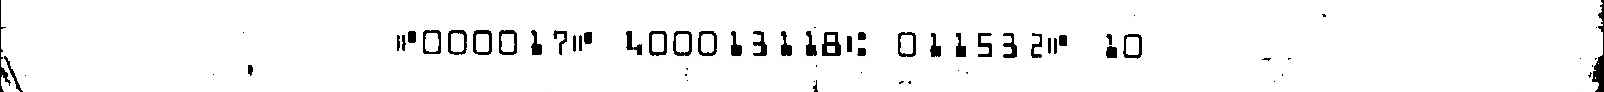

In [29]:
import google.colab.patches
google.colab.patches.cv2_imshow(micr_img)

In [30]:
print(pytesseract.image_to_string(micr_img,  lang = 'mcr'))

c000017c 40001311802 011532c 10

1



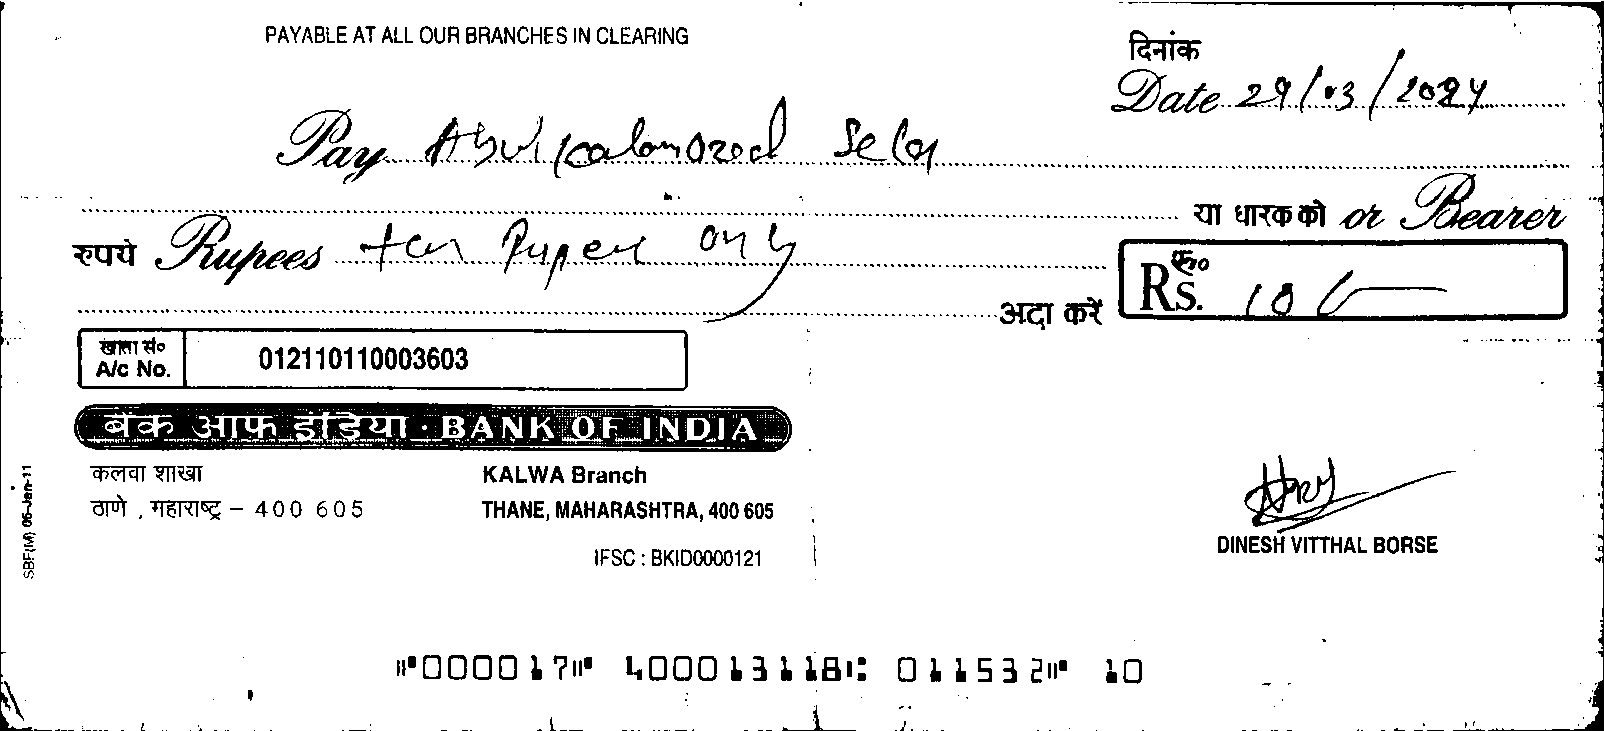

In [36]:
import google.colab.patches
import cv2
import numpy as np

img_np = np.array(image)  # Convert PIL Image to NumPy array

# Ensure 3 channels before converting to grayscale
if img_np.ndim == 2:
    img_np = cv2.cvtColor(img_np, cv2.COLOR_GRAY2BGR)

gray = cv2.cvtColor(img_np, cv2.COLOR_BGR2GRAY) # Now convert to grayscale
_, binary = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

google.colab.patches.cv2_imshow(binary)